In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [18]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

In [19]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [20]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,14377.400391,12755.599609,12897.700195,14156.400391,12136299520,14156.400391
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [22]:
prediction_days = 60

In [23]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
47/47 [==============================] - 13s 105ms/step - loss: 0.0158
Epoch 2/25
47/47 [==============================] - 5s 109ms/step - loss: 0.0038
Epoch 3/25
47/47 [==============================] - 6s 124ms/step - loss: 0.0034
Epoch 4/25
47/47 [==============================] - 5s 110ms/step - loss: 0.0032
Epoch 5/25
47/47 [==============================] - 5s 110ms/step - loss: 0.0029
Epoch 6/25
47/47 [==============================] - 6s 128ms/step - loss: 0.0033
Epoch 7/25
47/47 [==============================] - 6s 132ms/step - loss: 0.0031
Epoch 8/25
47/47 [==============================] - 5s 118ms/step - loss: 0.0028
Epoch 9/25
47/47 [==============================] - 6s 121ms/step - loss: 0.0027
Epoch 10/25
47/47 [==============================] - 5s 117ms/step - loss: 0.0025
Epoch 11/25
47/47 [==============================] - 5s 100ms/step - loss: 0.0023
Epoch 12/25
47/47 [==============================] - 5s 111ms/step - loss: 0.0020
Epoch 13/25
47/47 [=====

In [26]:
test_start = dt.datetime(2022, 1, 1)
test_end = dt.datetime.now()

In [27]:
test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [28]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [29]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

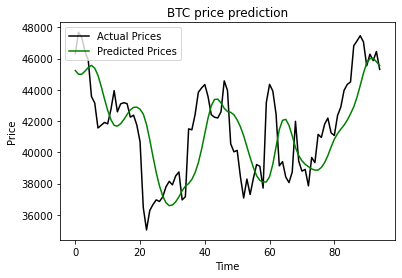

In [31]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()